# Red Blood Cells

In [170]:
import cv2
import matplotlib.pyplot as plt
import copy

## Load, convert to grayscale, resize

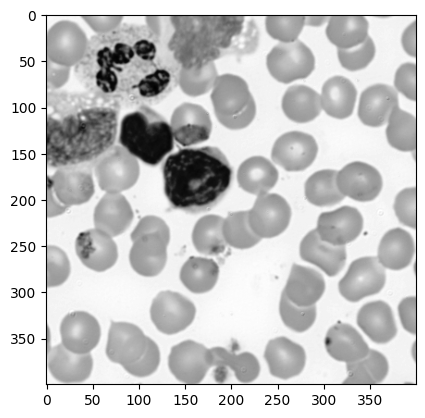

In [171]:
img = cv2.imread("blood.png")
img = cv2.resize(img, (400, 400)) # linear interpolation

orig_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap="gray")

## Reduce Noise by Blurring

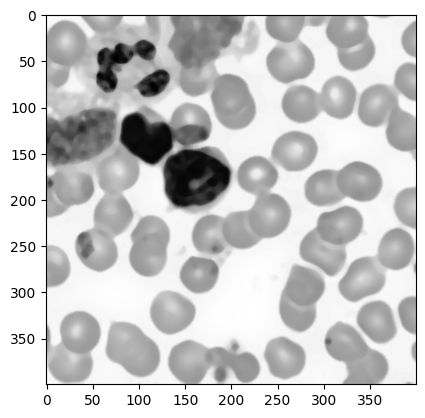

In [172]:
filtered = cv2.medianBlur(img, 7)
plt.imshow(filtered, cmap="gray")

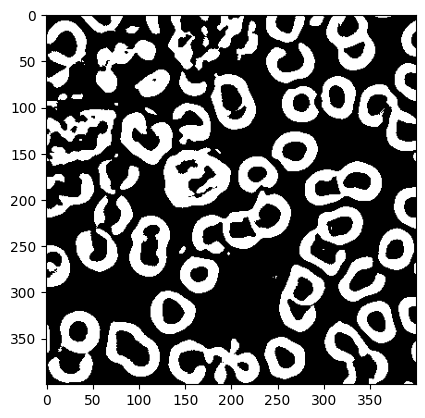

In [173]:
bin_img = cv2.adaptiveThreshold(filtered, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 25, 5)
plt.imshow(bin_img, cmap="gray")

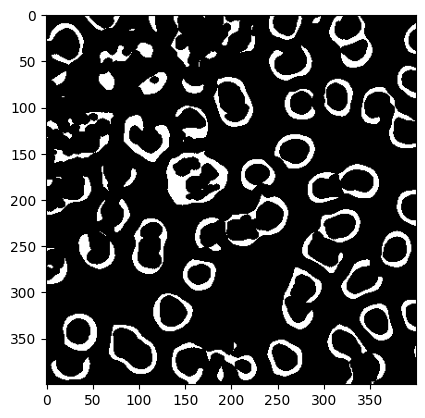

In [174]:
struct_elem = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7)) 
bin_img = cv2.erode(bin_img, struct_elem)
plt.imshow(bin_img, cmap="gray")

In [175]:
contours, _ = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"Number of cells {len(contours)}")

Number of cells 97


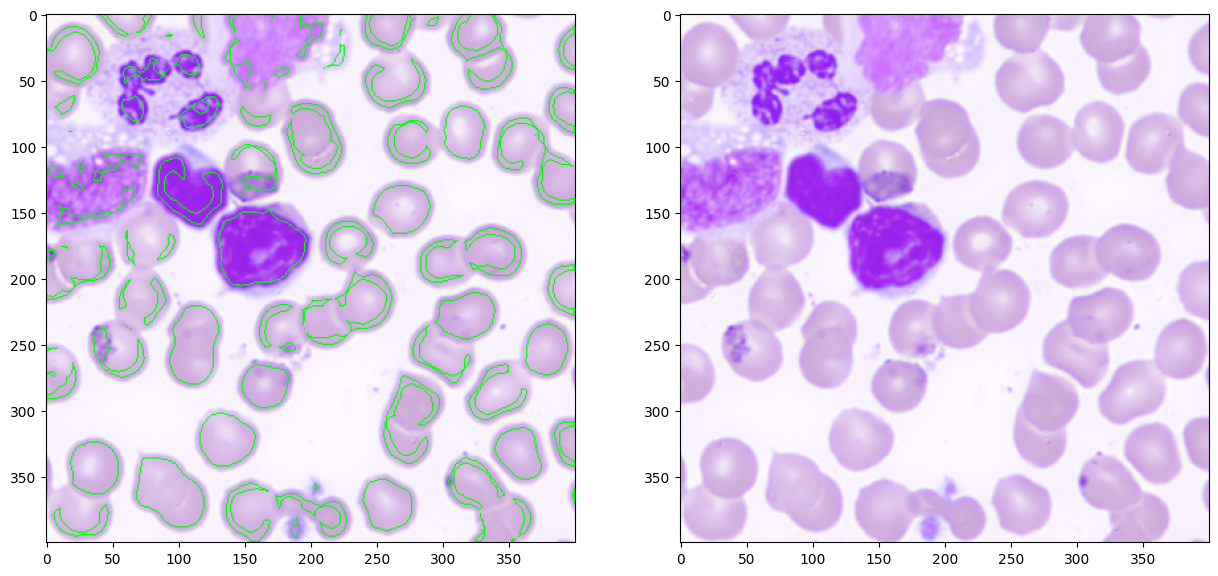

In [176]:
img_no_contours = copy.deepcopy(orig_img)
img_contours = cv2.drawContours(orig_img, contours, -1, (0, 255, 0))

fig = plt.figure(figsize=(15,30))

rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(img_contours)

fig.add_subplot(rows, columns, 2)
plt.imshow(img_no_contours)

plt.show()